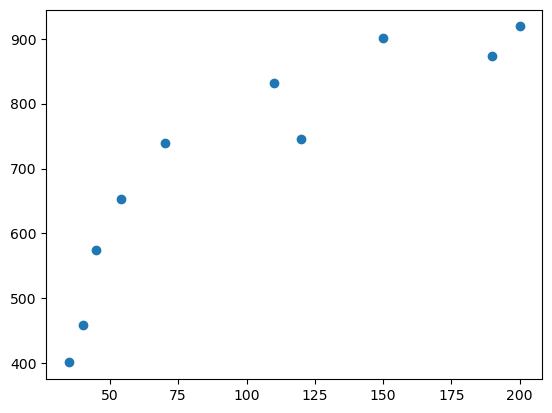

In [7]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.show()

In [23]:
b1=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1

2.620538882402765

In [24]:
b0=np.mean(ks)-b1*np.mean(zp)
b0

444.1773573243596

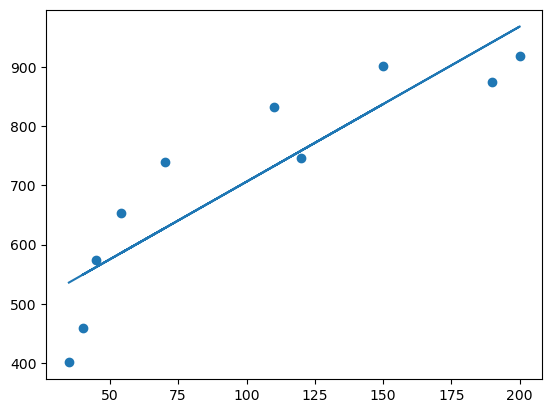

In [26]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp)
plt.show()

In [5]:
ks = ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [8]:
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [9]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([444.17735732,   2.62053888])

In [13]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [14]:
zp=zp.reshape((-1,1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [15]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

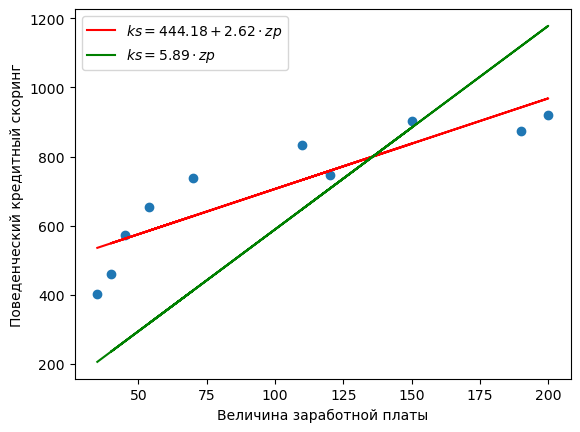

In [16]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, B*zp, c='g', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [92]:
def mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)
mse(2.62, zp, ks)

203812.48504

In [98]:
def mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)
alpha=1e-06
b=0.1
mse_min=mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [107]:
def mse_b0b1(b0, b1, x, y):
    return np.sum(((b0 + b1 * x) - y)**2)/len(x)

In [111]:
def mse_pb0(b0,b1,x,y):  
    return 2 * np.sum((b0 + b1*x)-y)/len(x)

In [109]:
def mse_pb1(b0,b1,x,y):
    return 2*np.sum(((b0+b1*x)-y)*x)/len(x)

In [121]:
alpha=2e-05
b1=0.1
b0=0.1
mse_b0b1_min=mse_b0b1(b0, b1, zp, ks)
i_min=1
b1_min=b1
b2_min=b2

for i in range(10000000):
    b0-=alpha*mse_pb0(b0,b1,zp,ks)
    b1 -= alpha * mse_pb1(b0, b1, zp, ks)
    if i%100000==0:
        print(f'Итерация #{i}, b0={b0}, b1={b1}, mse={mse_b0b1(b0, b1, zp,ks)}')
    if mse_b0b1(b0, b1,zp,ks)>mse_b0b1_min:
        print(f'Итерация #{i_min}, b0={b0_min}, b1={b1_min}, mse={mse_b0b1_min},\nДостигнут минимум.')
        break
    else:
        mse_b0b1_min=mse_b0b1(b0, b1,zp,ks)
        i_min=i
        b1_min=b1
        b0_min=b0
print(f'b0={b0_min}\nb1={b1_min}')

Итерация #0, b0=0.1279864, b1=3.2900424871616005, mse=149534.4630407137
Итерация #100000, b0=283.20179551172504, b1=3.8053781674635885, mse=13043.666374171964
Итерация #200000, b0=385.81842359810236, b1=3.0500820784912013, mse=7334.3373107277675
Итерация #300000, b0=423.0203251182559, b1=2.776262413545125, mse=6583.959691228398
Итерация #400000, b0=436.5072375468181, b1=2.6769937823342893, mse=6485.337494891745
Итерация #500000, b0=441.39668672610526, b1=2.6410056397572768, mse=6472.375570978358
Итерация #600000, b0=443.169272809353, b1=2.627958754851675, mse=6470.671984181705
Итерация #700000, b0=443.8118935437733, b1=2.6232288301167515, mse=6470.448081619614
Итерация #800000, b0=444.04486468814724, b1=2.621514076889419, mse=6470.418654086247
Итерация #900000, b0=444.1293243876281, b1=2.620892422466707, mse=6470.41478642296
Итерация #1000000, b0=444.15994380556174, b1=2.620667052299677, mse=6470.414278095634
Итерация #1100000, b0=444.1710443512677, b1=2.62058534820441, mse=6470.414211